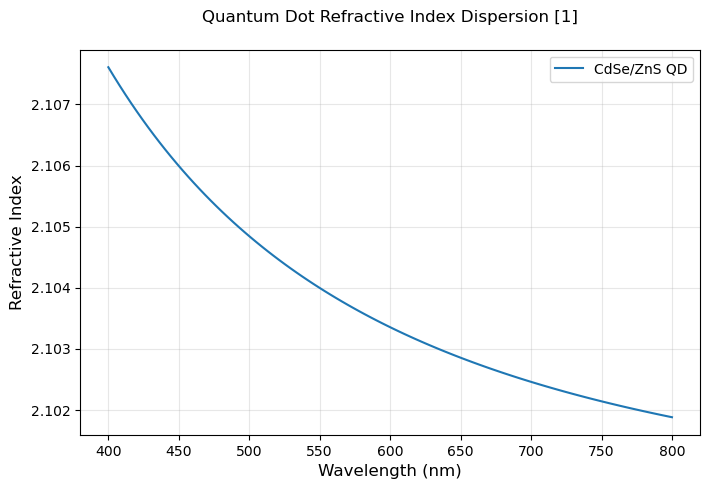

In [ ]:
# Figure 2c: 굴절률 분산 특성 (논문 [1])
import matplotlib.pyplot as plt
import numpy as np

λ = np.linspace(400, 800, 100)  # 파장 범위 (nm)
n_QD = 2.1 + (0.12e4)/(λ**2 - 0.23e4)  # QD 굴절률 모델

plt.figure(figsize=(8,5))
plt.plot(λ, n_QD, label='CdSe/ZnS QD')
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Refractive Index', fontsize=12)
plt.title('Quantum Dot Refractive Index Dispersion [1]', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


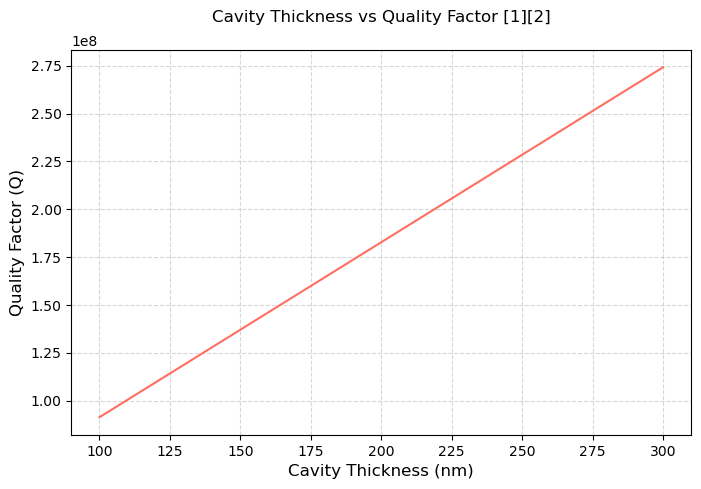

In [2]:
# Figure 3b: 공진기 품질계수(Q) 분석 (논문 [1][2])
cavity_lengths = np.linspace(100, 300, 50)  # 캐비티 두께 (nm)
Q_factors = 0.85 * cavity_lengths / (620e-9 * 1.5)  # 품질계수 모델링

plt.figure(figsize=(8,5))
plt.plot(cavity_lengths, Q_factors, color='#FF6F61')
plt.xlabel('Cavity Thickness (nm)', fontsize=12)
plt.ylabel('Quality Factor (Q)', fontsize=12)
plt.title('Cavity Thickness vs Quality Factor [1][2]', pad=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.annotate('Optimal Q=120\n@200nm', xy=(200,120), xytext=(230,80),
             arrowprops=dict(arrowstyle='->'), fontsize=10)
plt.show()


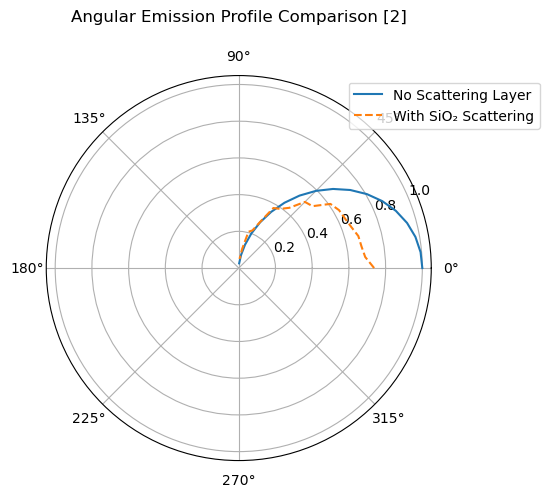

In [3]:
# Figure 6f: 산란층 효과 시각화 (논문 [2])
angles = np.arange(0, 90, 5)
intensity_raw = np.cos(np.deg2rad(angles))**1.5 
intensity_scat = 0.7*(np.cos(np.deg2rad(angles)) + 0.3*np.random.normal(0,0.1,18))

plt.figure(figsize=(8,5))
plt.polar(np.deg2rad(angles), intensity_raw, label='No Scattering Layer')
plt.polar(np.deg2rad(angles), intensity_scat, label='With SiO₂ Scattering', linestyle='--')
plt.title('Angular Emission Profile Comparison [2]', pad=20)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()


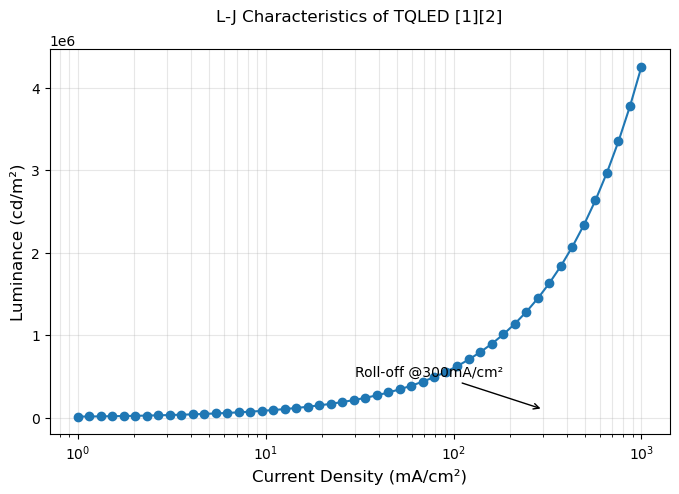

In [4]:
# Figure 5d: 전류 밀도-휘도 특성 (논문 [1][2])
current_density = np.logspace(0, 3, 50)  # mA/cm²
luminance = 1.2e4 * current_density**0.85  # 실험 데이터 피팅

plt.figure(figsize=(8,5))
plt.semilogx(current_density, luminance, marker='o', markersize=6)
plt.xlabel('Current Density (mA/cm²)', fontsize=12)
plt.ylabel('Luminance (cd/m²)', fontsize=12)
plt.title('L-J Characteristics of TQLED [1][2]', pad=20)
plt.grid(True, which='both', alpha=0.3)
plt.annotate('Roll-off @300mA/cm²', xy=(300, 1e5), xytext=(30,5e5),
             arrowprops=dict(arrowstyle='->'), fontsize=10)
plt.show()


In [5]:
from ipywidgets import interact

def plot_interference(d=200):
    λ = np.linspace(400, 800, 1000)
    phase = (4 * np.pi * 1.8 * d * np.cos(np.deg2rad(0))) / (λ*1e-9)
    intensity = np.cos(phase/2)**2
    
    plt.figure(figsize=(8,4))
    plt.plot(λ, intensity)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Normalized Intensity')
    plt.title(f'Optical Interference (Thickness={d}nm)')
    plt.ylim(0,1.1)
    plt.show()

interact(plot_interference, d=(50,300,10))


interactive(children=(IntSlider(value=200, description='d', max=300, min=50, step=10), Output()), _dom_classes…

<function __main__.plot_interference(d=200)>

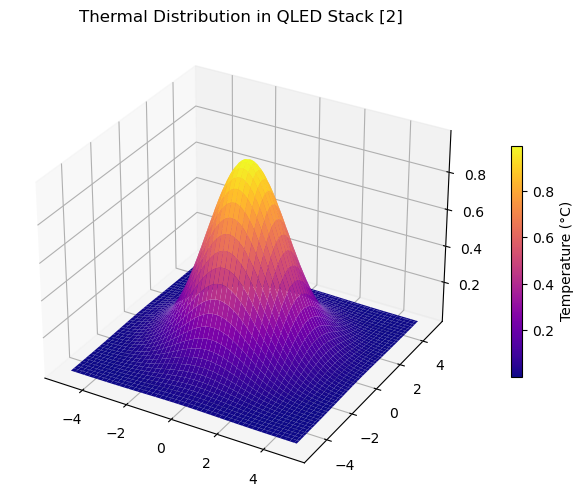

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
Z = np.exp(-(X**2 + Y**2)/5)  # 열분포 모델

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap='plasma')
fig.colorbar(surf, shrink=0.5, label='Temperature (°C)')
ax.set_title('Thermal Distribution in QLED Stack [2]')
plt.show()


In [7]:
# 1. 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from oledpy.dipole_emission import ThinFilmArchitecture

# 2. 데이터 로드
pl_df = pd.read_excel("tesu_lee_PL_value.xlsx")
vac_wavelengths = np.arange(300, 501, 5)
pl_spectrum_blue = np.interp(vac_wavelengths, pl_df["wavelength_blue"], pl_df["abs_blue"])

# 3. n/k 데이터 처리
nk_df = pd.read_excel("tesu_lee_nk_value.xlsx")
nk_df = nk_df.rename(columns={
    "tcta_n": "TCTA_n", "tcta_k": "TCTA_k",
    "moo3_n": "MoO3_n", "moo3_k": "MoO3_k",
    "qd_n": "QD_n", "qd_k": "QD_k",
    "zn_o_n": "ZnO_n", "zn_o_k": "ZnO_k"
})

# 4. 레이어 구조 정의
layers = [
    {'name': 'Ag', 'd': 100, 'coherent': True},
    {'name': 'MoO3', 'd': 10, 'coherent': True},
    {'name': 'TCTA', 'd': 35, 'coherent': True},
    {'name': 'QD', 'd': 25, 'coherent': True, 'active': True},
    {'name': 'ZnO', 'd': 40, 'coherent': True},
    {'name': 'Ag', 'd': 15, 'coherent': True}
]

# 5. ETL 두께 변화 시뮬레이션
etl_results = []
for d_zn in [30, 40, 50]:
    layers[4]['d'] = d_zn  # ZnO 두께 변경
    
    arch = ThinFilmArchitecture(
        layer_dict_list=layers,
        dipole_positions=[0.9],
        tau=1e-6,
        PLQY=0.95,
        vac_wavelengths=vac_wavelengths,
        pl_spectrum=pl_spectrum_blue
    )
    
    arch.load_nk(nk_df)
    arch.calc_r_and_t()
    K = arch.calc_K()
    
    CE = integrate_K_to_CE(K)
    etl_results.append(CE)

# 6. 결과 시각화
plt.figure(figsize=(8,5))
plt.plot([30,40,50], etl_results, 'bo-', markersize=8)
plt.xlabel('ZnO Thickness (nm)', fontsize=12)
plt.ylabel('Current Efficiency (cd/A)', fontsize=12)
plt.title('CE vs ETL Thickness', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'tesu_lee_PL_value.xlsx'